In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
data="/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/NotMnist_filterd_data"

In [64]:
import os
for i in os.listdir(data):
  print(i)

Y_labels.pickle
X_features.pickle


In [0]:
import pickle
X_features = pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/NotMnist_filterd_data/X_features.pickle","rb"))
Y_labels = pickle.load(open("/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/NotMnist_filterd_data/Y_labels.pickle","rb"))

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [74]:
len(X_features), len(Y_labels), X_features[10],Y_labels[10]

(1120, 1120, array([[163, 163, 181, ...,   0,   0,   0],
        [163, 163, 181, ...,   0,   0,   0],
        [134, 134, 150, ...,   0,   0,   0],
        ...,
        [145, 145, 158, ...,   0,   0,   0],
        [176, 176, 192, ...,   0,   0,   0],
        [176, 176, 192, ...,   0,   0,   0]], dtype=uint8), 5)

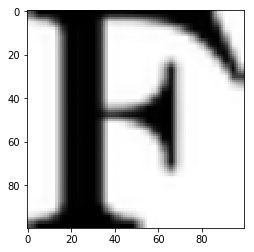

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X_features[10],cmap="binary")
plt.show()
# yeah features of array with label match correctly .. here [A-J] match with[0-9]

In [143]:
X_features = np.array(X_features).reshape(-1,100,100,1) 
# we need to pass again three args overhear also otherwise its just make it single vector array.
Y_labels = np.array(Y_labels).reshape(-1)
X_features.shape, Y_labels.shape

((1120, 100, 100, 1), (1120,))

In [0]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))
# normalization of data for easy to calculations.
X_features = X_features/255.0

In [162]:
# i dont want to run and test now its take time to train the data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X_features.shape[1:]))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X_features,Y_labels,batch_size=64,epochs=3,validation_split=0.3)

Train on 784 samples, validate on 336 samples
Epoch 1/3
784/784 [==============================] - 35s 45ms/sample - loss: 2.2854 - acc: 0.1811 - val_loss: 2.1743 - val_acc: 0.2530
Epoch 2/3
784/784 [==============================] - 33s 43ms/sample - loss: 1.7745 - acc: 0.4426 - val_loss: 1.5489 - val_acc: 0.5625
Epoch 3/3
784/784 [==============================] - 33s 42ms/sample - loss: 1.1492 - acc: 0.6429 - val_loss: 1.2772 - val_acc: 0.6845


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(X_features,Y_labels,batch_size=64,epochs=10,validation_split=0.3)

Train on 784 samples, validate on 336 samples
Epoch 1/10
784/784 [==============================] - 1s 639us/sample - loss: 1.7995 - acc: 0.4477 - val_loss: 1.2160 - val_acc: 0.6429
Epoch 2/10
784/784 [==============================] - 0s 334us/sample - loss: 0.7689 - acc: 0.7844 - val_loss: 0.9041 - val_acc: 0.7827
Epoch 3/10
784/784 [==============================] - 0s 381us/sample - loss: 0.5785 - acc: 0.8278 - val_loss: 0.9134 - val_acc: 0.7946
Epoch 4/10
784/784 [==============================] - 0s 382us/sample - loss: 0.4369 - acc: 0.8852 - val_loss: 1.0155 - val_acc: 0.7857
Epoch 5/10
784/784 [==============================] - 0s 362us/sample - loss: 0.3931 - acc: 0.8992 - val_loss: 0.9252 - val_acc: 0.7976
Epoch 6/10
784/784 [==============================] - 0s 327us/sample - loss: 0.3238 - acc: 0.9209 - val_loss: 0.8826 - val_acc: 0.8065
Epoch 7/10
784/784 [==============================] - 0s 334us/sample - loss: 0.2788 - acc: 0.9362 - val_loss: 0.9575 - val_acc: 0.7857
Ep

In [149]:
predict = model.predict([X_features])
predict, predict.shape

(array([[0.06210596, 0.25614154, 0.05279406, ..., 0.16455084, 0.03813248,
         0.04585436],
        [0.09941404, 0.05235133, 0.01626857, ..., 0.01714637, 0.5426076 ,
         0.10513765],
        [0.02345388, 0.16828841, 0.04152001, ..., 0.03177312, 0.22728583,
         0.01930765],
        ...,
        [0.10662067, 0.15274383, 0.01367287, ..., 0.02922631, 0.43161836,
         0.108563  ],
        [0.13136424, 0.05162167, 0.01719742, ..., 0.02693502, 0.2896423 ,
         0.37520784],
        [0.02730178, 0.22024459, 0.07871073, ..., 0.13503605, 0.01012702,
         0.02191434]], dtype=float32), (1120, 10))

In [151]:
np.argmax(predict[5428])

IndexError: ignored

In [109]:
a=cv2.imread(X_features[970],cv2.IMREAD_GRAYSCALE)
cv2.imshow("a",a)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: ignored

In [124]:
type(X_features[970]),X_features.shape

(numpy.ndarray, (1120, 100, 100, 1))

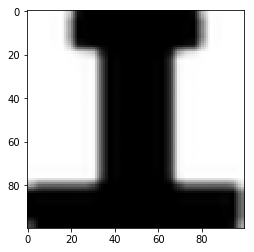

In [141]:
a = X_features[970]

plt.imshow(np.squeeze(a),cmap="binary")
plt.show()